<a href="https://colab.research.google.com/github/LH-1169213/ML/blob/main/A2c_DL_TC5033_AD2023_Team_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

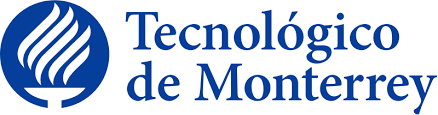

#**Master in Applied Artificial Intelligence**
##**Course: Advanced Machine Learning Methods**
###**Tecnológico de Monterrey**
###**Professor: José Antonio Cantoral Ceballos**

## **Activity 2c: Exploring Transfer Learning with CIFAR-10**

###**Team 5:**

###**A01748750 - Evelyn Aylin Rendón Medina**
###**A01002111 - Luis Salvador Cruz Najera**
###**A01169213 - Laura Elena Hernández Mata**
###**A01793052 - Juan Carlos Lopez Cruz**

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.




## Content import and libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

In [ ]:
import matplotlib.pyplot as plt

## Mounting google drive:

This code is to mount the google drive to storage the images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download Cifar10 dataset

The following code is to read the Cifar10 data set previusly dowloaded in activity 2b.

DATA PATH is the data path to Read the data, it would be Read in the google drive.

Transformation data change the Cifar10 data to Tensor and then Normilize the data using the mean and standard deviation, the values are known values that are common to normalize Cifrar10 data.

Dataloader is wrapping the data to allowing that each MINIBATCH includes random samples of all the clases in a random way.




In [ ]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/cifar-10/cifar-10-batches-py'
#DATA_PATH = '/content/drive/MyDrive/11_AMLM/Modulo 2/Semana_4/Cifar10'
DATA_PATH = '/content/drive/MyDrive/11_AMLM/Modulo 2/Semana_4/Cifar10'
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64
transform_imagenet = T.Compose([
                T.Resize(224),
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### This cycle for print shows the shape for each element of the val_loader:

* i represents the elements that val_loder includes, we 79 elements is because we devided in 78 batch of 64  images and 1 batch of 8 images.

* x.shape shows the [ batch size, numer of chanels of the image, image size hight, image width ]

*y.shape represent [batch size of the label]

In [ ]:
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

## Using  GPUs.

This code is to assign the memory to use if the GPU is available if would be assigned to CUDA but if GPU is not available it would assign CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Image preview.

This code is to plot a random image from the test dataset.

La imagen muestreada representa un: Car


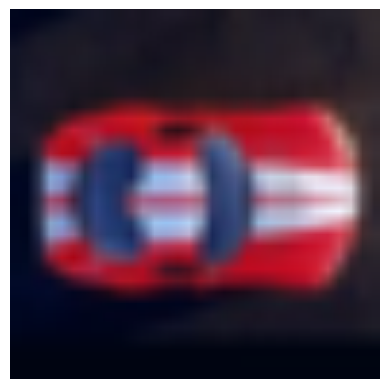

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

In one of the code executions, this image was randomly shown:

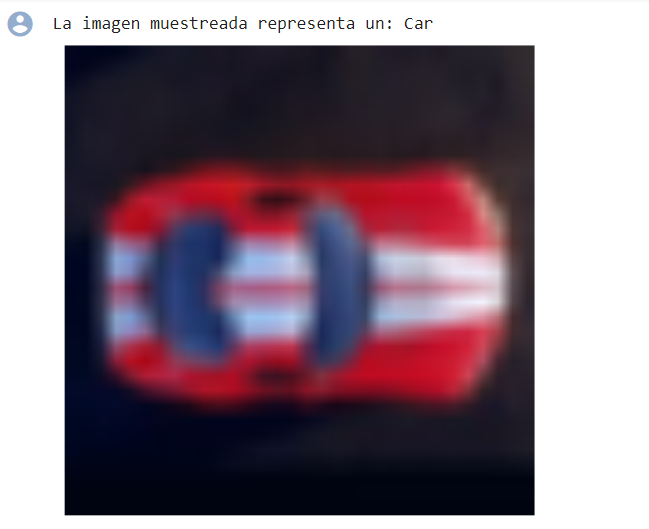

Calculate accuracy

This function is to calculate acurracy using the pythorch.

The torch.no_grad is to desactivate the gradient calculation for the evaluation.


In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad(): # For the accuracy calculation we will not calculate grad or update parameters
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total



## **Load pre-train model Resnet18**




According (Pytorch.org,s.f.) Resnet18 has in the iteration #5 an accuracy of 89.078 % in the imagenet 1000 clases problem.

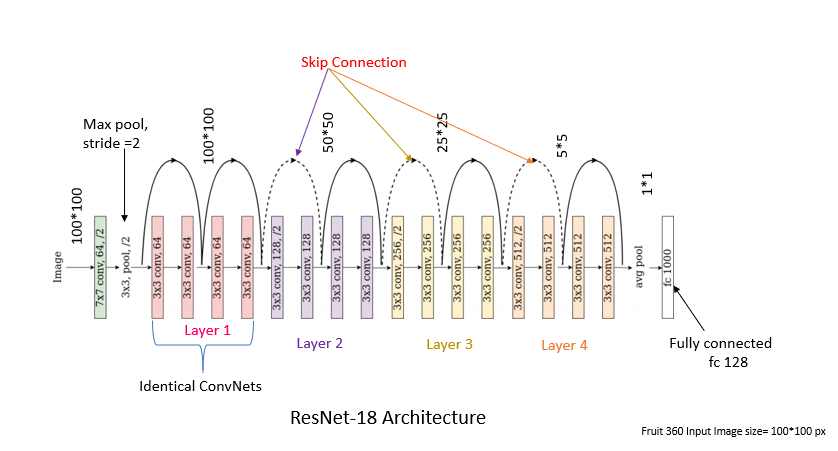

Singhal,G.(2020). Resnet-18 Architecture

#### The following instruction load the Resnet18 model with all the parameters pretrained.

####models.resnet18(pretrained=True): This function call does a couple of things. Firstly, models.resnet18 points to the ResNet-18 architecture available in PyTorch’s torchvision module. ResNet-18 is a deep residual network, and the “18” refers to the depth of the network, meaning it has 18 layers.

####pretrained=True: This argument indicates that we’re not initializing the weights of the model from scratch. Instead, we’re loading the weights that were learned when this model was pre-trained on ImageNet, a very large and general dataset. This is a key aspect of transfer learning - using the knowledge (in this form of pre-trained weights) obtained from training on one task (like ImageNet classification) to improve performance on a related task (like CIFAR-10 classification).



In [ ]:
model_resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 138MB/s]


### **Exploring Resnet18 model**

####In this code snippet, We're looping through all the parameters of our model_resnet18, which is an instance of the pretrained ResNet-18 model. By using enumerate, we can keep track of the index i (which is quite handy for debugging or any sort of analysis) and get the parameter w simultaneously during each iteration of the loop.

####"i" is simply the index, showing the position of the parameter tensor in the model.
####"w" refers to the parameter tensor itself.

#### With w.shape: We're printing out the shape of each parameter tensor w. This is crucial to understand the dimensionality of our parameters at each layer. This is particularly relevant when working with neural networks, where ensuring that the tensor shapes are compatible as we move through the network is critical.

#### w.requires_grad: This will display a boolean value. If True, it implies that this parameter tensor w will be updated during backpropagation when we train our model. If it's False, the parameter tensor remains static during training. This is quite essential when employing transfer learning, where we might freeze some layers (by setting requires_grad to False) to retain their pretrained characteristics, and possibly only train a subset of the layers.

In [ ]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

The following instruction shows the content of the Resnet18 model

In [ ]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

###**Resnet18 model adjustment for cifar10**


####Here, we are creating a new neural network model, model_aux, using a somewhat common PyTorch pattern to selectively utilize layers from a pre-existing model, which in this case is model_resnet18.

####model_resnet18.children(): With this function, we're accessing the child modules (i.e., layers or groups of layers) of model_resnet18. This function returns an iterator over the immediate child modules, allowing me to loop through or convert them to a list.

####list(model_resnet18.children()): By converting the child modules into a list, we're making them accessible via indices, which would be useful if I wanted to selectively utilize specific layers from the original model.

####*list(model_resnet18.children()): The asterisk * is used for unpacking elements from the list. Essentially, it extracts the layers out of the list and passes them as individual arguments to nn.Sequential.

####nn.Sequential(*list(model_resnet18.children())): we're building a new sequential model, model_aux, by stacking the layers from model_resnet18. nn.Sequential is a container that is designed to run the enclosed modules in a sequential manner, essentially forming a composite layer.

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children()))
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In this line, we're creating a new model, model_aux, that is composed of all but the last child module (layer or group of layers) of the original model_resnet18.

model_resnet18.children(): We're using this to obtain an iterator over the child modules of model_resnet18.

list(model_resnet18.children())[:-1]: By converting the child modules to a list and applying [:-1], We're excluding the last child module. This is typically done to remove the final classification layer of a pre-trained model, which is configured for the original training task.

nn.Sequential(*list(model_resnet18.children())[:-1]): By wrapping the extracted layers (excluding the last one) into nn.Sequential and unpacking them with *, we're creating a new sequential model, model_aux, that preserves the order and structure of the original layers (except for the omitted final layer).

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

The last element (element 9) was removed. Following instruction is showing.

In [ ]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

### **Pretrain Resnet18 without Gradient Calculation during backpropagation.**

####In this code segment, I'm iterating through each parameter of the model_aux and setting its requires_grad attribute to False. The implications and utility of this action are significant, especially in the realm of transfer learning. Let me explain in more detail:

####model_aux.parameters(): This call retrieves an iterator over all the parameters (or weights) of the model_aux neural network.

####enumerate(model_aux.parameters()): Using enumerate not only allows me to access each parameter but also provides an index i. This can be useful for reference, though in this specific code, we aren't using the index for any purpose.

####parameter.requires_grad = False: The critical operation here is the setting of requires_grad to False. When a parameter's requires_grad attribute is set to False, it effectively "freezes" that parameter, meaning it will not be updated during the backpropagation phase of training. The gradients for this parameter will not be computed, hence saving computational resources.

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False



####The model is adding the last element that we eliminated in the model_aux, the reason is because we need to adjust the Resnet18 model, it has an output of 1000 classes for imagenet database, but cifar10 has only 10 classes.

####model1: We're constructing a new sequential model which comprises:

####model_aux: The previously defined model (comprising most of the ResNet-18 architecture, excluding its final layer).

####nn.Flatten(): This layer is crucial for flattening the output from model_aux before feeding it into the fully connected (linear) layer. It reshapes the data from a multi-dimensional tensor into a 1D tensor.

####nn.Linear(in_features=512, out_features= 10, bias=True): This is a fully connected layer, intended to perform classification based on the features extracted by model_aux. Ensure that in_features matches the output size from model_aux, and out_features aligns with the number of classes in our classification task (10 in a common use-case like CIFAR-10).

In [ ]:
lr = 5e-4
epochs = 3

model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))


In [ ]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

#### Train loop

The train function takes model, optimiser, and epochs as input, with a default value of 100 for epochs if it’s not provided.

The model is sent to a computing device which should be either a GPU or CPU.

The model is set to training mode to enable features like dropout.
Input (xi) and target (yi) data are moved to the device and assigned proper data types.

The model generates predictions (scores), and the cross entropy loss (cost) is computed between the scores and true labels.

Gradients are zeroed to prevent accumulation, computed with respect to the loss, and an optimization step updates the model parameters.

After each epoch, the model's performance is evaluated on a validation set via an accuracy function, which should be defined externally.

The epoch number, final batch cost, and validation accuracy are printed. Regularly printing or storing these metrics assists in monitoring the model's training progress.

In [ ]:
def train(model, optimiser, epochs=100):
#     def train(model, optimiser, scheduler = None, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        acc = accuracy(model, val_loader)
#         if epoch%5 == 0:
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')
#         scheduler.step()

The train will be 3 epochs, optimiser Adam  and model 1 adjusted without gradiente calculation during backpropagation.

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.4584434032440186, accuracy: 0.7774,
Epoch: 1, costo: 0.8646440505981445, accuracy: 0.7978,
Epoch: 2, costo: 0.6493667364120483, accuracy: 0.7994,


The acurracy observed during the train after is 79.94 % and cost of 0.6493 (5 min running at GPU colab)

In [ ]:
accuracy(model1, test_loader)

0.7975

The accuracy obtained with the test_loader data set is 79.48%.

### **Pretrain Resnet18 with Gradient Calculation during backpropagation.**

The following instruction load the Resnet18 model with all the parameters pretrained, this instruction is required if the grad flag is required in True.

In [ ]:
model_resnet18 = models.resnet18(pretrained=True)

The following instruction will eliminate the las element of the restnet18 in other words, we are eliminating the last layer.

In [ ]:
model_aux2= nn.Sequential(*list(model_resnet18.children())[:-1])

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.

*The betas parameter is the exponential decay coefficients for the first and second moment estimates of the gradients. In Adam, these coefficients control how the gradients are combined at each step. The first value, 0.9 in this case, is the coefficient for momentum (similar to momentum in other optimizers). The second value, 0.999 in this case, is the coefficient for the quadratic moment.

In [ ]:
lr = 5e-4
epochs = 3

model2 = nn.Sequential(model_aux2,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model2.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model2, optimiser, epochs)

Epoch: 0, costo: 0.12869684398174286, accuracy: 0.9128,
Epoch: 1, costo: 0.9545468688011169, accuracy: 0.9196,
Epoch: 2, costo: 0.8824459314346313, accuracy: 0.918,


The acurracy observed during the train after is 91% and cost of 0.50  (6 min running at GPU colab)

In [ ]:
accuracy(model2, test_loader)

0.9156

The accuracy obtained with the test_loader data set is 90.7%.

The following code demostrates that model2 has activated the calculation of gradient during backpropagation.

In [ ]:
for i, w in enumerate(model2.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

## **Load pre-train model GoogLeNet**

**Justification:**

According (Pytorch.org,s.f.) Googlenet has in the iteration #5 an accuracy of 89.53 % in the imagenet 1000 clases problem.

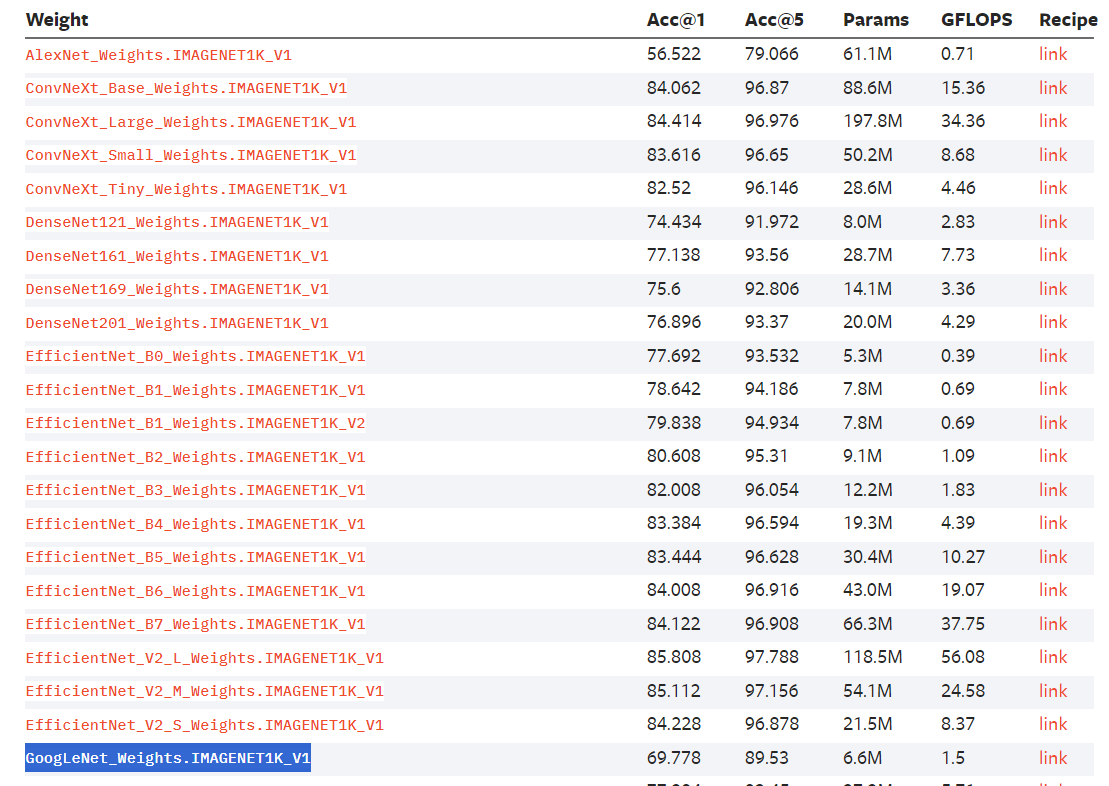

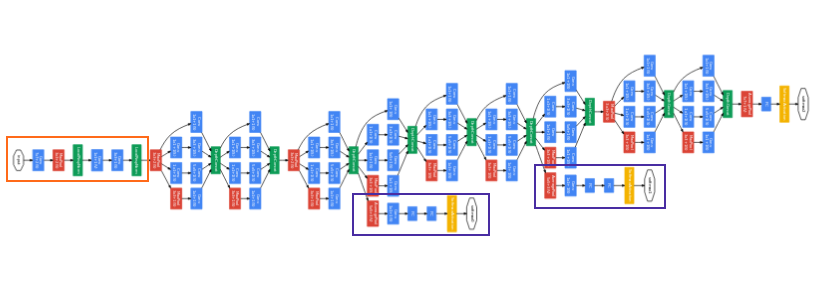

Kurama, V. (2020). GoogleNet

#### The following instruction load the GoogleNet model with all the parameters pretrained.

In [ ]:
model_googlenet= models.googlenet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 33.8MB/s]


In [ ]:
model_googlenet

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Similar as Resnet18 we need to eliminate the last layer to change the the output from 1000 classes to 10 clasess.

In [ ]:
model_aux3= nn.Sequential(*list(model_googlenet.children())[:-1])

### **Pretrain GoogleNet without Gradient Calculation during backpropagation.**

The following code turn off the calculation of the gradient during the backpropagation

In [ ]:
for i, parameter in enumerate(model_aux3.parameters()):
    parameter.requires_grad = False

In [ ]:
model_aux3

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (5): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (bra

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.

In [ ]:
lr = 5e-4
epochs = 3
model3= nn.Sequential(model_aux3,
                       nn.Flatten(),
                       nn.Linear(in_features=1024, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model3.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model3, optimiser, epochs)

Epoch: 0, costo: 0.7739018201828003, accuracy: 0.7782,
Epoch: 1, costo: 0.9008603692054749, accuracy: 0.7894,
Epoch: 2, costo: 1.0283550024032593, accuracy: 0.7994,


The acurracy observed during the train after is 79.94% and cost is 1.028 (5 min running at GPU colab)



In [ ]:
accuracy(model3, test_loader)

0.7917

The accuracy obtained with the test_loader data set is 79.17%.

### **Pretrain GoogleNet with Gradient Calculation during backpropagation.**

The following instruction load the Googlenet model with all the parameters pretrained, this instruction is required if the grad flag is required in True.

In [ ]:
model_googlenet = models.googlenet(pretrained=True)

The following instruction will eliminate the las element of the googlenet in other words, we are eliminating the last layer.

In [ ]:
model_aux4= nn.Sequential(*list(model_googlenet.children())[:-1])

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.



In [ ]:
lr = 5e-4
epochs = 3

model4 = nn.Sequential(model_aux4,
                       nn.Flatten(),
                       nn.Linear(in_features=1024, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model4.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model4, optimiser, epochs)

Epoch: 0, costo: 0.7396523356437683, accuracy: 0.9074,
Epoch: 1, costo: 0.654755175113678, accuracy: 0.9198,
Epoch: 2, costo: 0.6783035397529602, accuracy: 0.9232,


The acurracy observed during the train after is 92.32% and cost is 0.67 (8 min running at GPU colab)

In [ ]:
accuracy(model4, test_loader)

0.9165

The accuracy obtained with the test_loader data set is 91.65%.

The following code demostrates that model4 has activated the calculation of gradient during backpropagation.

In [ ]:
for i, w in enumerate(model4.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 1, 1]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([192, 64, 3, 3]) True
7 torch.Size([192]) True
8 torch.Size([192]) True
9 torch.Size([64, 192, 1, 1]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([96, 192, 1, 1]) True
13 torch.Size([96]) True
14 torch.Size([96]) True
15 torch.Size([128, 96, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([16, 192, 1, 1]) True
19 torch.Size([16]) True
20 torch.Size([16]) True
21 torch.Size([32, 16, 3, 3]) True
22 torch.Size([32]) True
23 torch.Size([32]) True
24 torch.Size([32, 192, 1, 1]) True
25 torch.Size([32]) True
26 torch.Size([32]) True
27 torch.Size([128, 256, 1, 1]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([128, 256, 1, 1]) True
31 torch.Size([128]) True
32 torch.Size([128]) True
33 torch.Size([192, 128, 3, 3]) True
34 torch.Size([192]) 

## **Load pre-train model DenseNet121**

**Justification:**

According (Pytorch.org,s.f.) Densenet121 has in the iteration #5 an accuracy of 91.972 % in the imagenet 1000 clases problem.

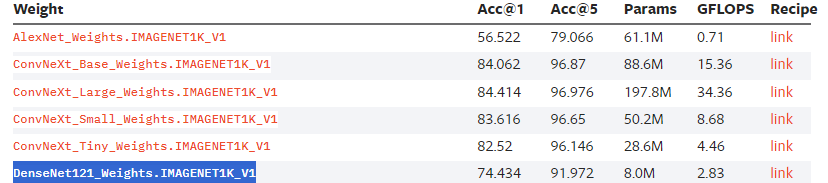

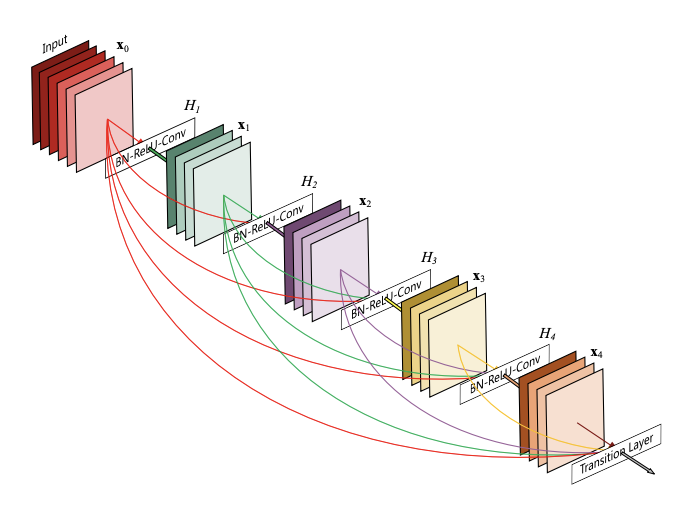

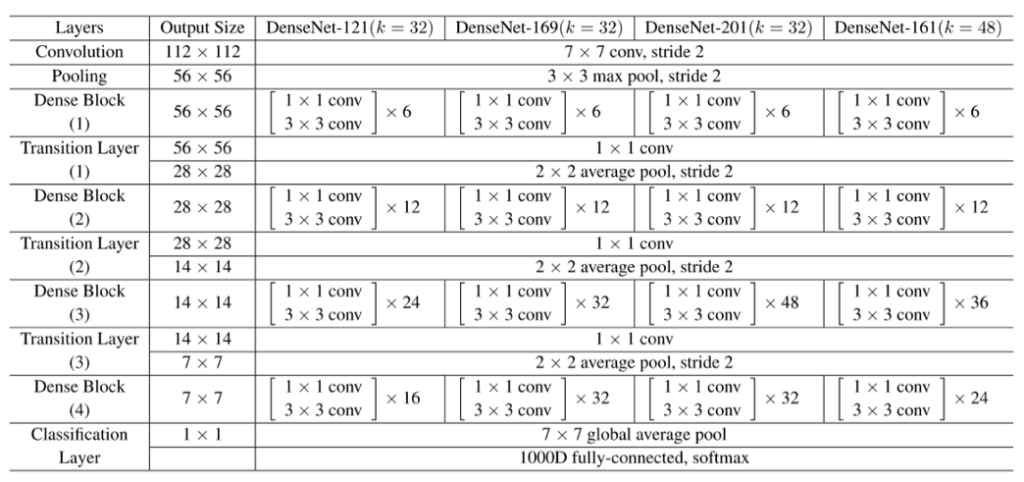

Pytorch Team (s.f)  Dense Convolutional Network (DenseNet)

#### The following instruction load the Densenet121 model with all the parameters pretrained.

In [ ]:
model_densenet121= models.densenet121(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 120MB/s] 


In [ ]:
model_densenet121

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Similar as Resnet18 we need to eliminate the last layer to change the the output from 1000 classes to 10 clasess.

In [ ]:
model_aux5= nn.Sequential(*list(model_densenet121.children())[:-1])

### **Pretrain Densenet121 without Gradient Calculation during backpropagation.**

The following code turn off the calculation of the gradient during the backpropagation

In [ ]:
for i, parameter in enumerate(model_aux5.parameters()):
    parameter.requires_grad = False

In [ ]:
model_aux5

Sequential(
  (0): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): R

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.

In [ ]:
lr = 5e-4
epochs = 3
model5 = nn.Sequential(model_aux5,
                       nn.Flatten(),
                       nn.Linear(in_features=50176, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model5.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model5, optimiser, epochs)

Epoch: 0, costo: 2.7247538566589355, accuracy: 0.81,
Epoch: 1, costo: 5.386275768280029, accuracy: 0.8016,
Epoch: 2, costo: 0.00036459098919294775, accuracy: 0.8256,


The acurracy observed during the train after is 82.56% and cost is 0.003 (8 min running at GPU colab)



In [ ]:
accuracy(model5, test_loader)

0.8254

The accuracy obtained with the test_loader data set is 82.54%.

## **Load pre-train model Mobilenet_V3_Large**

**Justification:**

According (Pytorch.org,s.f.) Mobile_V3_large has in the iteration #5 an accuracy of 91.34 % in the imagenet 1000 clases problem.

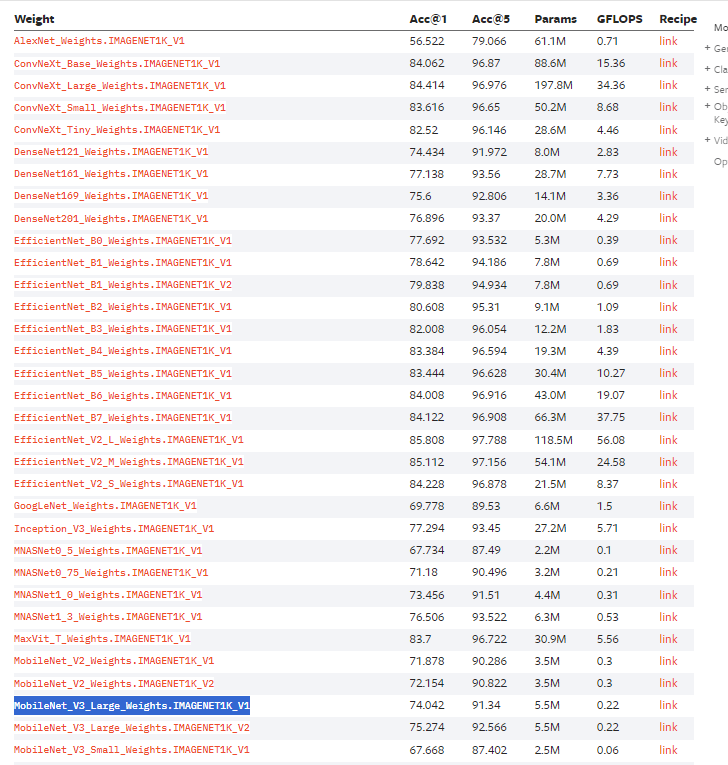


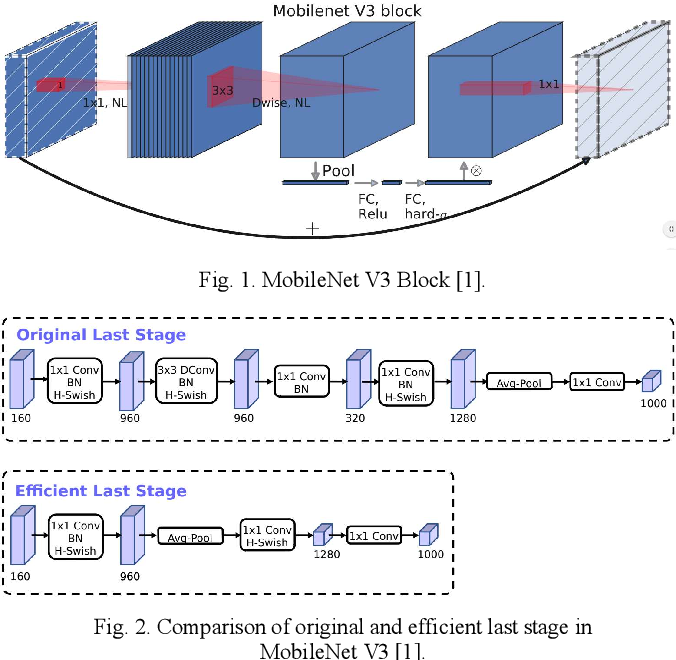

#### The following instruction load the MobileNEt V3 model with all the parameters pretrained.

In [ ]:
model_mobilenet= models.mobilenet_v3_large(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 95.7MB/s]


In [ ]:
model_mobilenet

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

Similar as Resnet18 we need to eliminate the last layer to change the the output from 1000 classes to 10 clasess.

In [ ]:
model_aux7= nn.Sequential(*list(model_mobilenet.children())[:-1])

### **Pretrain MobileNet_V3 without Gradient Calculation during backpropagation.**

The following code turn off the calculation of the gradient during the backpropagation

In [ ]:
for i, parameter in enumerate(model_aux7.parameters()):
    parameter.requires_grad = False

In [ ]:
model_aux7

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.

In [ ]:
lr = 5e-4
epochs = 3
model7 = nn.Sequential(model_aux7,
                       nn.Flatten(),
                       nn.Linear(in_features=960, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model7.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model7, optimiser, epochs)

Epoch: 0, costo: 0.5969762802124023, accuracy: 0.7996,
Epoch: 1, costo: 0.4981168806552887, accuracy: 0.8132,
Epoch: 2, costo: 0.7053074240684509, accuracy: 0.828,


The acurracy observed during the train after is 82.8% and cost is 0.7 (5 min running at GPU colab)



In [ ]:
accuracy(model7, test_loader)

0.8142

The accuracy obtained with the test_loader data set is 81.42%.

### **Pretrain Mobilenet_v3 with Gradient Calculation during backpropagation.**

The following instruction load the Googlenet model with all the parameters pretrained, this instruction is required if the grad flag is required in True.

In [ ]:
model_mobilenet= models.mobilenet_v3_large(pretrained=True)

The following instruction will eliminate the las element of the restnet18 in other words, we are eliminating the last layer.

In [ ]:
model_aux8= nn.Sequential(*list(model_mobilenet.children())[:-1])

The following code will set he hyperparameter and add the last layer to modify the output from 1000 classes to 10 classes.



In [ ]:
lr = 5e-4
epochs = 3

model8 = nn.Sequential(model_aux8,
                       nn.Flatten(),
                       nn.Linear(in_features=960, out_features= 10, bias= True))
optimiser = torch.optim.Adam(model8.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model8, optimiser, epochs)

Epoch: 0, costo: 0.4839733839035034, accuracy: 0.9204,
Epoch: 1, costo: 0.03775884583592415, accuracy: 0.936,
Epoch: 2, costo: 0.22822028398513794, accuracy: 0.9272,


The acurracy observed during the train after is 92.72% and cost is 0.22 (6 min running at GPU colab)

In [ ]:
accuracy(model8, test_loader)

0.9261

The accuracy obtained with the test_loader data set is 92.61%.

The following code demostrates that model4 has activated the calculation of gradient during backpropagation.

In [ ]:
for i, w in enumerate(model8.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([16, 3, 3, 3]) True
1 torch.Size([16]) True
2 torch.Size([16]) True
3 torch.Size([16, 1, 3, 3]) True
4 torch.Size([16]) True
5 torch.Size([16]) True
6 torch.Size([16, 16, 1, 1]) True
7 torch.Size([16]) True
8 torch.Size([16]) True
9 torch.Size([64, 16, 1, 1]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 1, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([24, 64, 1, 1]) True
16 torch.Size([24]) True
17 torch.Size([24]) True
18 torch.Size([72, 24, 1, 1]) True
19 torch.Size([72]) True
20 torch.Size([72]) True
21 torch.Size([72, 1, 3, 3]) True
22 torch.Size([72]) True
23 torch.Size([72]) True
24 torch.Size([24, 72, 1, 1]) True
25 torch.Size([24]) True
26 torch.Size([24]) True
27 torch.Size([72, 24, 1, 1]) True
28 torch.Size([72]) True
29 torch.Size([72]) True
30 torch.Size([72, 1, 5, 5]) True
31 torch.Size([72]) True
32 torch.Size([72]) True
33 torch.Size([24, 72, 1, 1]) True
34 torch.Size([24]) True
35 torch.Size([72, 2

##**Conclusions:**

The results of the Pre-train models are the following:

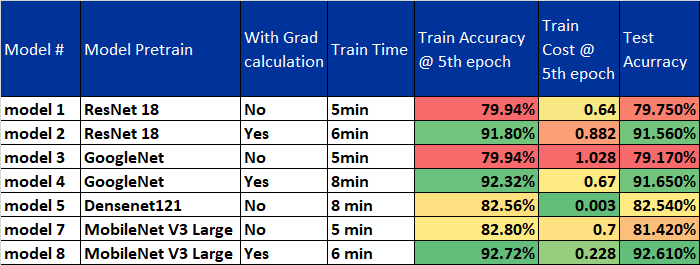

####After experimenting with various pre-trained models using CIFAR-10 for transfer learning, some intriguing observations and critical insights have been elucidated. Four distinct models were utilized, namely ResNet18, GoogleNet, DenseNet121, and MobileNet V3 Large, with particular attention to whether gradient calculation was permitted during training. The following conclusions can be drawn from the observed results:

###Impact of Gradient Calculation:

####Allowing gradient calculations, and hence fine-tuning, on the pre-trained models significantly improved their performance across all models tested. For instance, the test accuracy for ResNet18 jumped from 79.94% (without gradient calculation) to a notable 91.80% (with gradient calculation), substantiating the often-cited benefit of fine-tuning in transfer learning.

###Model-Specific Observations:

####**ResNet18:** Exhibited solid performance with and without gradient calculation, but especially benefited from fine-tuning, reaching 90.38% training accuracy after 5 epochs.
####**GoogleNet:** Demonstrated remarkable proficiency when gradient calculations were enabled, achieving a test accuracy of 91.65%, highlighting the model's capability when fine-tuned.
####**DenseNet121:** Displayed a test accuracy of 82.54% without the need for gradient calculation, suggesting an inherent robustness in feature extraction for CIFAR-10.
####**MobileNet V3 Large:** Showcased commendable results both in scenarios, but truly shined with gradient calculations enabled, attaining a test accuracy of 92.62%, marking it as the top performer amongst the models tested.

###Considerations of Cost:

####A variable train cost was observed across different models and settings, underscoring the need to balance accuracy and computational efficiency in practical applications.

####Notably, MobileNet V3 Large, even while achieving the highest accuracy, did not exhibit the lowest training cost, indicating that the relationship between cost, accuracy, and training dynamics merits further investigation.

###General Insights:

####The disparities between train and test accuracies hint towards the models’ generalization capabilities and their susceptibility to overfitting or underfitting under different configurations.

####It is important to add that the variance in performance between different architectures underscores the significance of architectural nuances and their alignment with specific task demands.

####Exploring diverse pre-trained models provided valuable insights into their behavior and efficacy in a transfer learning context on the CIFAR-10 dataset. The definitive advantage conferred by enabling gradient calculations was substantiated, affirming the merit in fine-tuning pre-trained models for improved performance on the target task.

####Furthermore, the variances in performance and cost among the models illuminate the intricate interplay between model architecture, training strategy, and task specificity, paving the way for more nuanced and model-specific optimization strategies in future endeavors. This experiment underscores the imperative of model experimentation, thoughtful selection, and judicious fine-tuning in leveraging transfer learning for computer vision tasks.

## **References**:

* Pytorch Team (s.f.). DENSENET. https://pytorch.org/hub/pytorch_vision_densenet/

* Pytorch.org. (s.f.). MODELS AND PRE-TRAINED WEIGHTS.https://pytorch.org/vision/stable/models.html

* Kurama, V. (2020).A Review of Popular Deep Learning Architectures: AlexNet, VGG16, and GoogleNet. Paperspace. https://blog.paperspace.com/popular-deep-learning-architectures-alexnet-vgg-googlenet/
* Singhal,G.(2020).Transfer Learning with ResNet in PyTorch.Plurasight.https://www.pluralsight.com/guides/introduction-to-resnet

* Ioffe, S. & Szehedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate ShiftLinks to an external site.

* He, K., Zhang, X., Ren, S. & Sun, J. (2015). Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification

* [Pepe Cantoral, Ph.D.]. (2021, Jul 6). ¡Red Neuronal usando PyTorch! PyTorch tutorialLinks to an external site.  [Video File]. YouTube

* [Pepe Cantoral, Ph-D.]. (2021, March 19).Backpropagation - Gradient Descent, Ejemplo completo –Fundamentos de Deep Learning – (Parte 9)Links to an external site. [Video File]. YouTube.

* [Pepe Cantoral, Ph-D.]. (2021, March 27). Funciones de Activación – Fundamentos de Deep Learning – (Parte 10)  [Video File]Links to an external site.. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, March 31). Redes Neuronales Multi-Capa / Deep Neural Networks – Fundamentos de Deep Learning -(Teoría parte 11)Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, May 15). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING!Links to an external site.[Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, May 18). ¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING - Parte 2!Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 11). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 1Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 13). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 2Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 17). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 3Links to an external site. [Video File]. YouTube.
* [Pepe Cantoral, Ph-D.]. (2021, December 17). Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 4Links to an external site. [Video File]. YouTube.